In [1]:
import pandas as pd


In [5]:
!ls data

yacht_hydrodynamics.data


In [8]:



pd.read_csv('data/yacht_hydrodynamics.data',header=None)

,0
0,-2.3 0.568 4.78 3.99 3.17 0.125 0.11
1,-2.3 0.568 4.78 3.99 3.17 0.150 0.27
2,-2.3 0.568 4.78 3.99 3.17 0.175 0.47
3,-2.3 0.568 4.78 3.99 3.17 0.200 0.78
4,-2.3 0.568 4.78 3.99 3.17 0.225 1.18
...,...
303,-2.3 0.600 4.34 4.23 2.73 0.350 8.47
304,-2.3 0.600 4.34 4.23 2.73 0.375 12.27
305,-2.3 0.600 4.34 4.23 2.73 0.400 19.59
306,-2.3 0.600 4.34 4.23 2.73 0.425 30.48


In [45]:
# Open the .data file in read mode
with open('data/yacht_hydrodynamics.data', 'r') as file:
    # Initialize lists to store features and labels
    features = []
    labels = []

    # Read all lines from the file
    lines = file.readlines()

    # Iterate through each line
    for line in lines:
        # Split the line into individual data elements using spaces as separators
        data_elements = line.split()

        # Check if the line has at least seven elements
        if len(data_elements) >= 7:
            # Extract the first six elements as features and the seventh element as the label
            features.append(data_elements[:6])  # Save the first six variables as features
            labels.append(data_elements[6])      # Save the seventh variable as the label
        else:
            print("End")

# Now you have 'features' containing the first six variables for each data point
# And 'labels' containing the seventh variable (label) for each data point


End


In [46]:
type(features)

list

In [47]:
# this dataset has not null values

Gerritsma,J., Onnink,R., and Versluis,A.. (2013). Yacht Hydrodynamics. UCI Machine Learning Repository. https://doi.org/10.24432/C5XG7R.

In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert features and labels to NumPy arrays
features = np.array(features, dtype='float32')
labels = np.array(labels, dtype='float32')

# Handle NaN values
# Find indices of NaN values
#nan_indices = np.isnan(features).any(axis=1)

# Remove rows with NaN values
#features = features[~nan_indices]
#labels = labels[~nan_indices]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now you have X_train, X_test as feature sets and y_train, y_test as label sets
# X_train and X_test are normalized feature sets


In [49]:
X_train

array([[ 1.5417534 ,  0.09300277, -0.07130707,  0.08720793, -0.20923313,
        -1.671137  ],
       [-0.01716293,  0.9514887 , -0.03088814, -0.18073319,  0.48302403,
         1.0513775 ],
       [-1.705989  ,  1.5953556 , -0.03088814,  0.53377575, -0.20923313,
         0.55637485],
       ...,
       [-0.01716293,  0.9514887 , -0.03088814, -0.18073319,  0.48302403,
         0.30887347],
       [-1.705989  , -1.4093502 , -0.03088814, -0.3414976 , -0.20923313,
        -0.6811318 ],
       [-0.01716293,  0.9514887 , -0.03088814, -0.18073319,  0.48302403,
        -0.6811318 ]], dtype=float32)

In [50]:
import keras
from keras import layers
#from keras import ops


from keras import Sequential

from keras.layers import Dense

In [51]:
for x in X_train:
    print(type(x[0]))
    break

<class 'numpy.float32'>


In [52]:
for y in y_train:
    print(type(y))
    break

<class 'numpy.float32'>


In [53]:

model = keras.Sequential()

model = Sequential()
model.add(Dense(128, activation="relu", input_dim=6))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
# Since the regression is performed, a Dense layer containing a single neuron with a linear activation function.
# Typically ReLu-based activation are used but since it is performed regression, it is needed a linear activation.
model.add(Dense(1, activation="linear"))

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(lr=1e-3))

# Patient early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=32, verbose=2)


Epoch 1/1000
7/7 - 1s - loss: 413.2733 - val_loss: 260.5243 - 654ms/epoch - 93ms/step
Epoch 2/1000
7/7 - 0s - loss: 406.6493 - val_loss: 258.3731 - 30ms/epoch - 4ms/step
Epoch 3/1000
7/7 - 0s - loss: 404.3825 - val_loss: 257.5167 - 33ms/epoch - 5ms/step
Epoch 4/1000
7/7 - 0s - loss: 403.2681 - val_loss: 256.4891 - 30ms/epoch - 4ms/step
Epoch 5/1000
7/7 - 0s - loss: 401.6110 - val_loss: 254.6851 - 29ms/epoch - 4ms/step
Epoch 6/1000
7/7 - 0s - loss: 399.0850 - val_loss: 252.3552 - 31ms/epoch - 4ms/step
Epoch 7/1000
7/7 - 0s - loss: 395.4128 - val_loss: 249.0268 - 29ms/epoch - 4ms/step
Epoch 8/1000
7/7 - 0s - loss: 390.4747 - val_loss: 244.4850 - 29ms/epoch - 4ms/step
Epoch 9/1000
7/7 - 0s - loss: 383.4634 - val_loss: 238.7926 - 32ms/epoch - 5ms/step
Epoch 10/1000
7/7 - 0s - loss: 375.5598 - val_loss: 231.3910 - 29ms/epoch - 4ms/step
Epoch 11/1000
7/7 - 0s - loss: 364.3728 - val_loss: 222.2182 - 29ms/epoch - 4ms/step
Epoch 12/1000
7/7 - 0s - loss: 351.4483 - val_loss: 211.4299 - 47ms/epoc

Epoch 100/1000
7/7 - 0s - loss: 8.3076 - val_loss: 6.4056 - 28ms/epoch - 4ms/step
Epoch 101/1000
7/7 - 0s - loss: 8.1810 - val_loss: 6.4883 - 28ms/epoch - 4ms/step
Epoch 102/1000
7/7 - 0s - loss: 8.2516 - val_loss: 6.3437 - 28ms/epoch - 4ms/step
Epoch 103/1000
7/7 - 0s - loss: 7.9140 - val_loss: 6.5879 - 29ms/epoch - 4ms/step
Epoch 104/1000
7/7 - 0s - loss: 7.9181 - val_loss: 6.5184 - 27ms/epoch - 4ms/step
Epoch 105/1000
7/7 - 0s - loss: 7.6875 - val_loss: 6.1383 - 29ms/epoch - 4ms/step
Epoch 106/1000
7/7 - 0s - loss: 7.5088 - val_loss: 6.4609 - 29ms/epoch - 4ms/step
Epoch 107/1000
7/7 - 0s - loss: 7.6129 - val_loss: 6.4353 - 31ms/epoch - 4ms/step
Epoch 108/1000
7/7 - 0s - loss: 7.4566 - val_loss: 6.7145 - 29ms/epoch - 4ms/step
Epoch 109/1000
7/7 - 0s - loss: 7.3728 - val_loss: 6.4414 - 30ms/epoch - 4ms/step
Epoch 110/1000
7/7 - 0s - loss: 7.4312 - val_loss: 6.7145 - 28ms/epoch - 4ms/step
Epoch 111/1000
7/7 - 0s - loss: 7.2228 - val_loss: 5.7162 - 28ms/epoch - 4ms/step
Epoch 112/1000
7

Epoch 200/1000
7/7 - 0s - loss: 1.2643 - val_loss: 1.7631 - 27ms/epoch - 4ms/step
Epoch 201/1000
7/7 - 0s - loss: 1.2695 - val_loss: 1.7652 - 27ms/epoch - 4ms/step
Epoch 202/1000
7/7 - 0s - loss: 1.2180 - val_loss: 1.8127 - 27ms/epoch - 4ms/step
Epoch 203/1000
7/7 - 0s - loss: 1.1831 - val_loss: 1.7687 - 28ms/epoch - 4ms/step
Epoch 204/1000
7/7 - 0s - loss: 1.2371 - val_loss: 1.6444 - 27ms/epoch - 4ms/step
Epoch 205/1000
7/7 - 0s - loss: 1.1636 - val_loss: 1.5955 - 28ms/epoch - 4ms/step
Epoch 206/1000
7/7 - 0s - loss: 1.1419 - val_loss: 1.7030 - 28ms/epoch - 4ms/step
Epoch 207/1000
7/7 - 0s - loss: 1.1252 - val_loss: 1.7186 - 30ms/epoch - 4ms/step
Epoch 208/1000
7/7 - 0s - loss: 1.1252 - val_loss: 1.6587 - 29ms/epoch - 4ms/step
Epoch 209/1000
7/7 - 0s - loss: 1.0802 - val_loss: 1.6046 - 28ms/epoch - 4ms/step
Epoch 210/1000
7/7 - 0s - loss: 1.0758 - val_loss: 1.6166 - 28ms/epoch - 4ms/step
Epoch 211/1000
7/7 - 0s - loss: 1.0593 - val_loss: 1.6564 - 33ms/epoch - 5ms/step
Epoch 212/1000
7

Epoch 300/1000
7/7 - 0s - loss: 0.2086 - val_loss: 0.3704 - 28ms/epoch - 4ms/step
Epoch 301/1000
7/7 - 0s - loss: 0.1945 - val_loss: 0.3572 - 29ms/epoch - 4ms/step
Epoch 302/1000
7/7 - 0s - loss: 0.1837 - val_loss: 0.3350 - 30ms/epoch - 4ms/step
Epoch 303/1000
7/7 - 0s - loss: 0.1735 - val_loss: 0.3332 - 29ms/epoch - 4ms/step
Epoch 304/1000
7/7 - 0s - loss: 0.1690 - val_loss: 0.3370 - 28ms/epoch - 4ms/step
Epoch 305/1000
7/7 - 0s - loss: 0.1663 - val_loss: 0.3294 - 29ms/epoch - 4ms/step
Epoch 306/1000
7/7 - 0s - loss: 0.1624 - val_loss: 0.3162 - 28ms/epoch - 4ms/step
Epoch 307/1000
7/7 - 0s - loss: 0.1832 - val_loss: 0.3042 - 29ms/epoch - 4ms/step
Epoch 308/1000
7/7 - 0s - loss: 0.2038 - val_loss: 0.3000 - 27ms/epoch - 4ms/step
Epoch 309/1000
7/7 - 0s - loss: 0.1858 - val_loss: 0.3541 - 28ms/epoch - 4ms/step
Epoch 310/1000
7/7 - 0s - loss: 0.1606 - val_loss: 0.2895 - 28ms/epoch - 4ms/step
Epoch 311/1000
7/7 - 0s - loss: 0.1597 - val_loss: 0.3085 - 28ms/epoch - 4ms/step
Epoch 312/1000
7

Epoch 400/1000
7/7 - 0s - loss: 0.0586 - val_loss: 0.2153 - 33ms/epoch - 5ms/step
Epoch 401/1000
7/7 - 0s - loss: 0.0579 - val_loss: 0.2108 - 33ms/epoch - 5ms/step
Epoch 402/1000
7/7 - 0s - loss: 0.0544 - val_loss: 0.2604 - 30ms/epoch - 4ms/step
Epoch 403/1000
7/7 - 0s - loss: 0.0613 - val_loss: 0.2144 - 29ms/epoch - 4ms/step
Epoch 404/1000
7/7 - 0s - loss: 0.0583 - val_loss: 0.1967 - 32ms/epoch - 5ms/step
Epoch 405/1000
7/7 - 0s - loss: 0.0571 - val_loss: 0.2456 - 29ms/epoch - 4ms/step
Epoch 406/1000
7/7 - 0s - loss: 0.0590 - val_loss: 0.2692 - 29ms/epoch - 4ms/step
Epoch 407/1000
7/7 - 0s - loss: 0.2227 - val_loss: 0.2489 - 28ms/epoch - 4ms/step
Epoch 408/1000
7/7 - 0s - loss: 0.1921 - val_loss: 0.3196 - 28ms/epoch - 4ms/step
Epoch 409/1000
7/7 - 0s - loss: 0.1098 - val_loss: 0.2327 - 30ms/epoch - 4ms/step
Epoch 410/1000
7/7 - 0s - loss: 0.0785 - val_loss: 0.1933 - 29ms/epoch - 4ms/step
Epoch 411/1000
7/7 - 0s - loss: 0.0800 - val_loss: 0.2532 - 29ms/epoch - 4ms/step
Epoch 412/1000
7

Epoch 500/1000
7/7 - 0s - loss: 0.0323 - val_loss: 0.2061 - 29ms/epoch - 4ms/step
Epoch 501/1000
7/7 - 0s - loss: 0.0301 - val_loss: 0.2025 - 28ms/epoch - 4ms/step
Epoch 502/1000
7/7 - 0s - loss: 0.0299 - val_loss: 0.1923 - 28ms/epoch - 4ms/step
Epoch 503/1000
7/7 - 0s - loss: 0.0279 - val_loss: 0.1853 - 29ms/epoch - 4ms/step
Epoch 504/1000
7/7 - 0s - loss: 0.0300 - val_loss: 0.2394 - 28ms/epoch - 4ms/step
Epoch 505/1000
7/7 - 0s - loss: 0.0408 - val_loss: 0.1931 - 32ms/epoch - 5ms/step
Epoch 506/1000
7/7 - 0s - loss: 0.0387 - val_loss: 0.1969 - 27ms/epoch - 4ms/step
Epoch 507/1000
7/7 - 0s - loss: 0.0333 - val_loss: 0.2226 - 28ms/epoch - 4ms/step
Epoch 508/1000
7/7 - 0s - loss: 0.0339 - val_loss: 0.2328 - 28ms/epoch - 4ms/step
Epoch 509/1000
7/7 - 0s - loss: 0.0341 - val_loss: 0.1888 - 29ms/epoch - 4ms/step
Epoch 510/1000
7/7 - 0s - loss: 0.0378 - val_loss: 0.1890 - 28ms/epoch - 4ms/step
Epoch 511/1000
7/7 - 0s - loss: 0.0263 - val_loss: 0.1971 - 28ms/epoch - 4ms/step
Epoch 512/1000
7

Epoch 600/1000
7/7 - 0s - loss: 0.0323 - val_loss: 0.1989 - 28ms/epoch - 4ms/step
Epoch 601/1000
7/7 - 0s - loss: 0.0203 - val_loss: 0.2175 - 28ms/epoch - 4ms/step
Epoch 602/1000
7/7 - 0s - loss: 0.0331 - val_loss: 0.1868 - 30ms/epoch - 4ms/step
Epoch 603/1000
7/7 - 0s - loss: 0.0245 - val_loss: 0.1819 - 27ms/epoch - 4ms/step
Epoch 604/1000
7/7 - 0s - loss: 0.0258 - val_loss: 0.1967 - 27ms/epoch - 4ms/step
Epoch 605/1000
7/7 - 0s - loss: 0.0185 - val_loss: 0.2416 - 29ms/epoch - 4ms/step
Epoch 606/1000
7/7 - 0s - loss: 0.0302 - val_loss: 0.2591 - 28ms/epoch - 4ms/step
Epoch 607/1000
7/7 - 0s - loss: 0.0493 - val_loss: 0.1857 - 28ms/epoch - 4ms/step
Epoch 608/1000
7/7 - 0s - loss: 0.0297 - val_loss: 0.1699 - 27ms/epoch - 4ms/step
Epoch 609/1000
7/7 - 0s - loss: 0.0298 - val_loss: 0.1924 - 29ms/epoch - 4ms/step
Epoch 610/1000
7/7 - 0s - loss: 0.0282 - val_loss: 0.2134 - 29ms/epoch - 4ms/step
Epoch 611/1000
7/7 - 0s - loss: 0.0273 - val_loss: 0.2057 - 28ms/epoch - 4ms/step
Epoch 612/1000
7

Epoch 700/1000
7/7 - 0s - loss: 0.0397 - val_loss: 0.2181 - 28ms/epoch - 4ms/step
Epoch 701/1000
7/7 - 0s - loss: 0.1642 - val_loss: 0.1901 - 28ms/epoch - 4ms/step
Epoch 702/1000
7/7 - 0s - loss: 0.1727 - val_loss: 0.4094 - 44ms/epoch - 6ms/step
Epoch 703/1000
7/7 - 0s - loss: 0.1208 - val_loss: 0.1914 - 28ms/epoch - 4ms/step
Epoch 704/1000
7/7 - 0s - loss: 0.1408 - val_loss: 0.2101 - 28ms/epoch - 4ms/step
Epoch 705/1000
7/7 - 0s - loss: 0.1385 - val_loss: 0.2134 - 29ms/epoch - 4ms/step
Epoch 706/1000
7/7 - 0s - loss: 0.0878 - val_loss: 0.1862 - 26ms/epoch - 4ms/step
Epoch 707/1000
7/7 - 0s - loss: 0.0810 - val_loss: 0.1969 - 28ms/epoch - 4ms/step
Epoch 708/1000
7/7 - 0s - loss: 0.1462 - val_loss: 0.2540 - 27ms/epoch - 4ms/step
Epoch 709/1000
7/7 - 0s - loss: 0.1139 - val_loss: 0.3218 - 28ms/epoch - 4ms/step
Epoch 710/1000
7/7 - 0s - loss: 0.1332 - val_loss: 0.3771 - 28ms/epoch - 4ms/step
Epoch 711/1000
7/7 - 0s - loss: 0.1004 - val_loss: 0.3441 - 27ms/epoch - 4ms/step
Epoch 712/1000
7

Epoch 800/1000
7/7 - 0s - loss: 0.0109 - val_loss: 0.1680 - 31ms/epoch - 4ms/step
Epoch 801/1000
7/7 - 0s - loss: 0.0105 - val_loss: 0.1608 - 31ms/epoch - 4ms/step
Epoch 802/1000
7/7 - 0s - loss: 0.0182 - val_loss: 0.1667 - 31ms/epoch - 4ms/step
Epoch 803/1000
7/7 - 0s - loss: 0.0227 - val_loss: 0.1446 - 31ms/epoch - 4ms/step
Epoch 804/1000
7/7 - 0s - loss: 0.0092 - val_loss: 0.1611 - 30ms/epoch - 4ms/step
Epoch 805/1000
7/7 - 0s - loss: 0.0120 - val_loss: 0.1425 - 30ms/epoch - 4ms/step
Epoch 806/1000
7/7 - 0s - loss: 0.0189 - val_loss: 0.1649 - 28ms/epoch - 4ms/step
Epoch 807/1000
7/7 - 0s - loss: 0.0182 - val_loss: 0.1414 - 31ms/epoch - 4ms/step
Epoch 808/1000
7/7 - 0s - loss: 0.0135 - val_loss: 0.1674 - 45ms/epoch - 6ms/step
Epoch 809/1000
7/7 - 0s - loss: 0.0140 - val_loss: 0.1441 - 25ms/epoch - 4ms/step
Epoch 810/1000
7/7 - 0s - loss: 0.0165 - val_loss: 0.1796 - 25ms/epoch - 4ms/step
Epoch 811/1000
7/7 - 0s - loss: 0.0082 - val_loss: 0.1576 - 25ms/epoch - 4ms/step
Epoch 812/1000
7

Epoch 900/1000
7/7 - 0s - loss: 0.0336 - val_loss: 0.1901 - 26ms/epoch - 4ms/step
Epoch 901/1000
7/7 - 0s - loss: 0.0212 - val_loss: 0.1667 - 25ms/epoch - 4ms/step
Epoch 902/1000
7/7 - 0s - loss: 0.0242 - val_loss: 0.1933 - 25ms/epoch - 4ms/step
Epoch 903/1000
7/7 - 0s - loss: 0.0171 - val_loss: 0.1424 - 25ms/epoch - 4ms/step
Epoch 904/1000
7/7 - 0s - loss: 0.0181 - val_loss: 0.1872 - 25ms/epoch - 4ms/step
Epoch 905/1000
7/7 - 0s - loss: 0.0198 - val_loss: 0.1423 - 25ms/epoch - 4ms/step
Epoch 906/1000
7/7 - 0s - loss: 0.0113 - val_loss: 0.1511 - 26ms/epoch - 4ms/step
Epoch 907/1000
7/7 - 0s - loss: 0.0195 - val_loss: 0.1371 - 25ms/epoch - 4ms/step
Epoch 908/1000
7/7 - 0s - loss: 0.0163 - val_loss: 0.1585 - 25ms/epoch - 4ms/step
Epoch 909/1000
7/7 - 0s - loss: 0.0122 - val_loss: 0.1415 - 25ms/epoch - 4ms/step
Epoch 910/1000
7/7 - 0s - loss: 0.0086 - val_loss: 0.1884 - 43ms/epoch - 6ms/step
Epoch 911/1000
7/7 - 0s - loss: 0.0095 - val_loss: 0.1515 - 25ms/epoch - 4ms/step
Epoch 912/1000
7

Epoch 1000/1000
7/7 - 0s - loss: 0.0241 - val_loss: 0.1817 - 25ms/epoch - 4ms/step


In [54]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.6290


0.6290424466133118

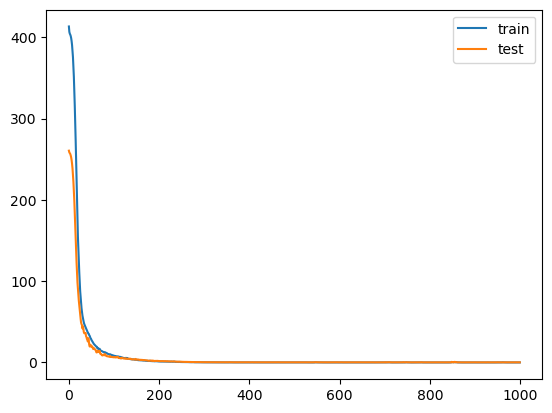

In [55]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [56]:
if features.shape[0] == labels.shape[0]:
    # Combine features and labels along the second axis (axis=1) to create the dataset
    dataset = np.concatenate((features, labels.reshape(-1, 1)), axis=1)
else:
    print("Number of samples in features and labels arrays do not match.")

In [57]:
dataset

array([[-2.3  ,  0.568,  4.78 , ...,  3.17 ,  0.125,  0.11 ],
       [-2.3  ,  0.568,  4.78 , ...,  3.17 ,  0.15 ,  0.27 ],
       [-2.3  ,  0.568,  4.78 , ...,  3.17 ,  0.175,  0.47 ],
       ...,
       [-2.3  ,  0.6  ,  4.34 , ...,  2.73 ,  0.4  , 19.59 ],
       [-2.3  ,  0.6  ,  4.34 , ...,  2.73 ,  0.425, 30.48 ],
       [-2.3  ,  0.6  ,  4.34 , ...,  2.73 ,  0.45 , 46.66 ]],
      dtype=float32)

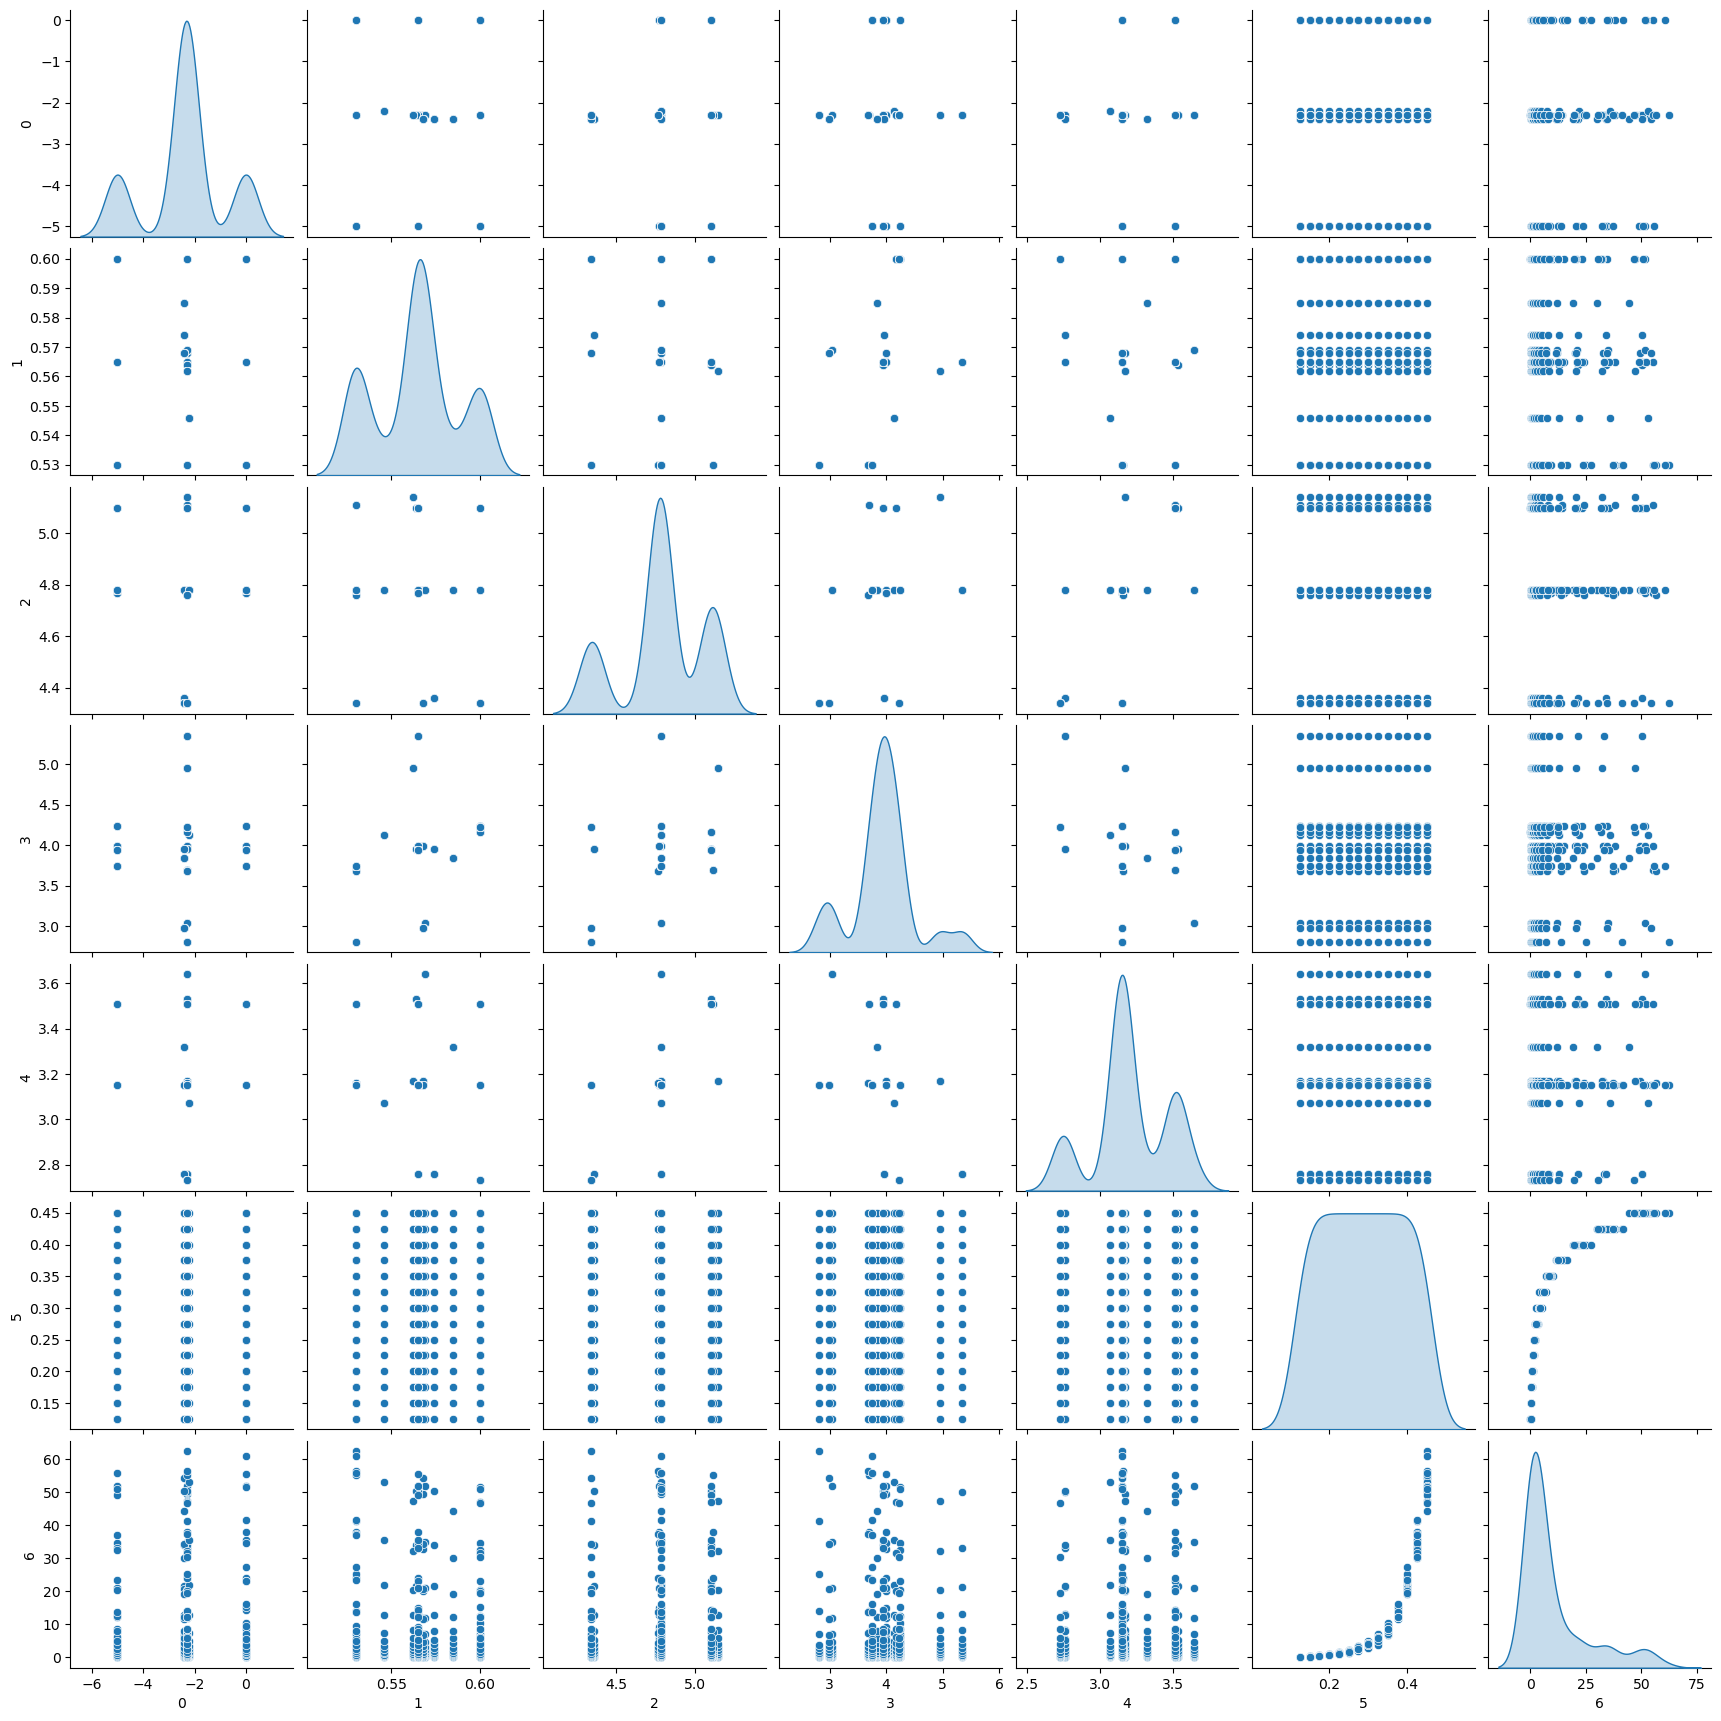

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 5 features and 1 label
# Replace 'df' with your actual DataFrame


df = pd.DataFrame(dataset)

# Drop any rows with missing values
df.dropna(inplace=True)

# Create a pair plot
sns.pairplot(df, kind='scatter', diag_kind='kde')
plt.show()


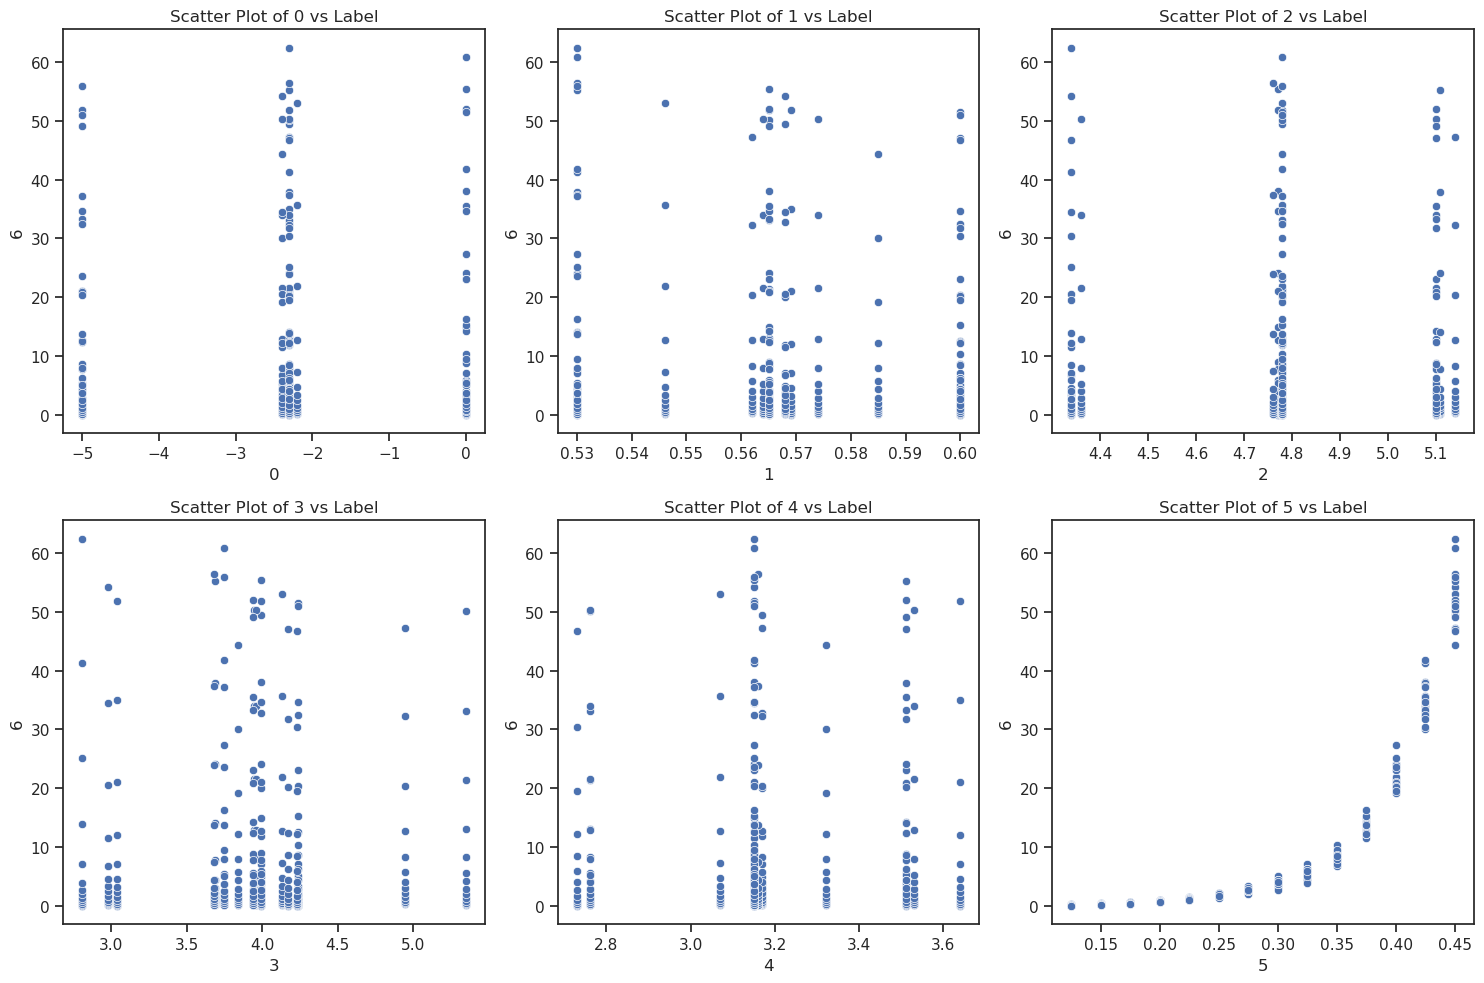

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your pandas DataFrame containing the features and labels

# Set the style for seaborn plots
sns.set(style="ticks")

# Calculate the number of rows needed based on the number of features
num_features = len(df.columns) - 1  # Exclude the last column which is the label
num_rows = (num_features + 2) // 3  # Add 2 to ensure that we round up

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each feature and create a scatter plot against the label
for i, feature in enumerate(df.columns[:-1]):  # Exclude the last column which is the label
    sns.scatterplot(x=feature, y=df.columns[-1], data=df, ax=axes[i])
    axes[i].set_title(f"Scatter Plot of {feature} vs Label")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(df.columns[-1])

# Hide the remaining empty subplots
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
